# WeRateDogs Twitter woof blog

## Some questions answered about your fawoofrite Twitter account

<a id='intro'></a>
## Introduction

> Since we gathered all this data, we wanted to offer you some insights on what our lovely hoomans are doing with our doggos Twitter account. Ready? 



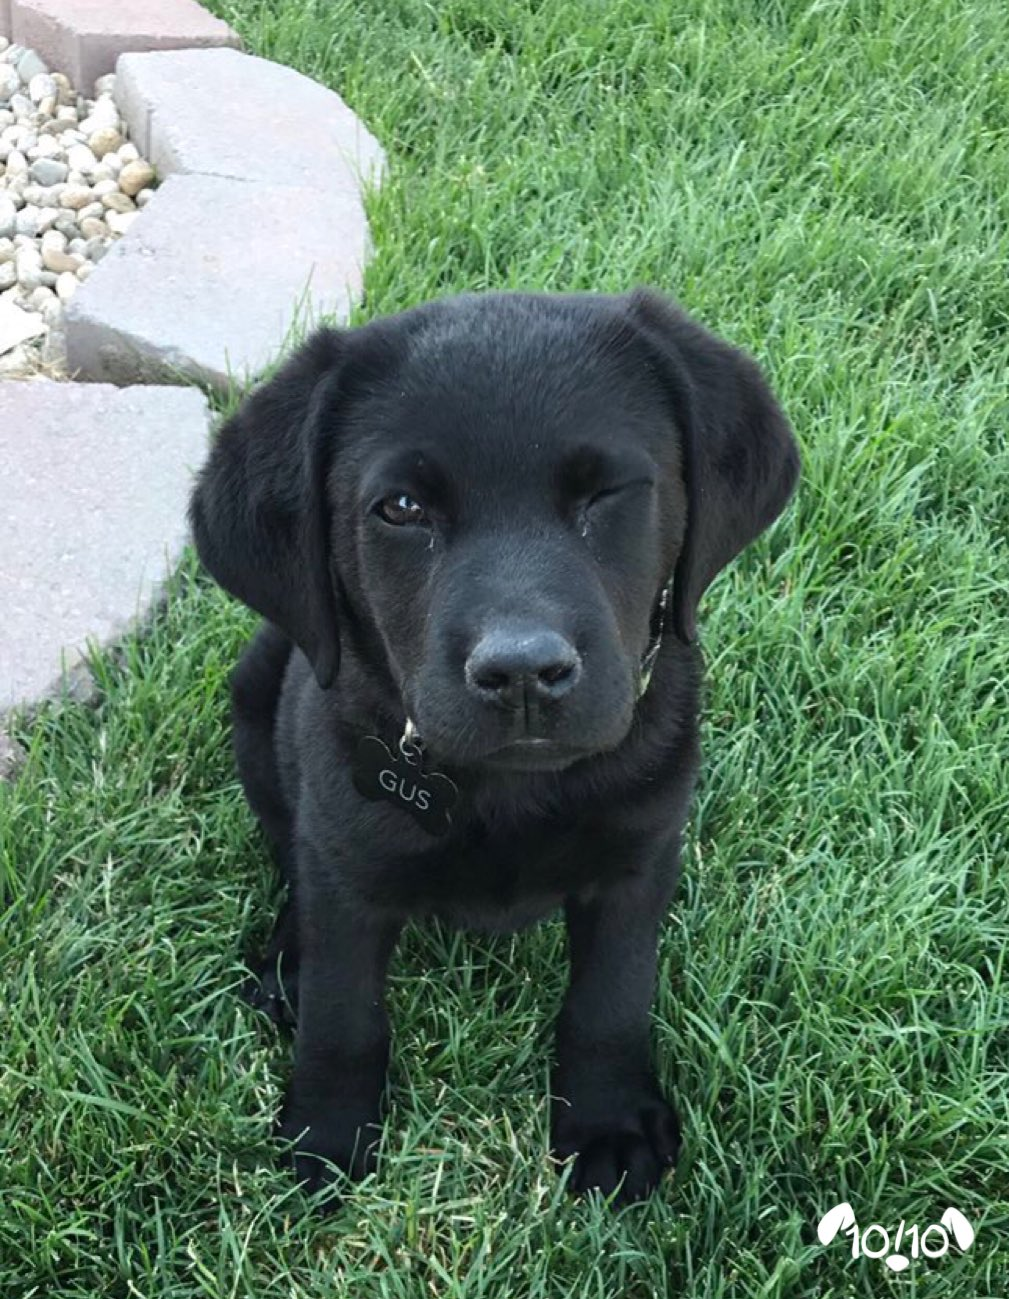

In [30]:
from IPython.display import Image
Image("doggie.jpg")

## Some questions of interest

>1. Which are the top 10 tweets based on the number of favourites counts?
>2. What are the dog breeds associated with the top 10 tweets mentioned above?
>3. What type of correlation can we observe between `favourite_ count` and `retweet_count` values?
>4. What is the average score of the `p1_conf` coeffiecient? How are the confidence scores distributed?
>5. What hours are the most popular for tweets to be tweeted at?

In [31]:
#Importing all the libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [32]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

#### 1. Which are the top 10 tweets based on the number of favourites counts? and 2. What are the dog breeds associated with the top 10 tweets mentioned above?

In [33]:
#Gathering the top 10 rows for the largest values of the favorite_count column 
top10favourite = twitter_archive_master.nlargest(10,'favorite_count')
top10favourite 

,favorite_count,retweet_count,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
763,157787,78531,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
302,134456,44286,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,...,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
393,121804,57280,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
107,117387,33241,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,...,2,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
798,116512,58240,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,NaN,...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
58,100087,40924,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
326,88925,37772,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
133,87260,28887,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,NaN,...,1,angora,0.224218,False,malamute,0.216163,True,persian_cat,0.128383,False
92,79126,24719,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10,Zoey,...,1,golden_retriever,0.841001,True,great_pyrenees,0.099278,True,labrador_retriever,0.032621,True
1402,79043,31651,678399652199309312,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12.0,10,NaN,...,1,swing,0.929196,False,bedlington_terrier,0.015047,True,great_pyrenees,0.014039,True


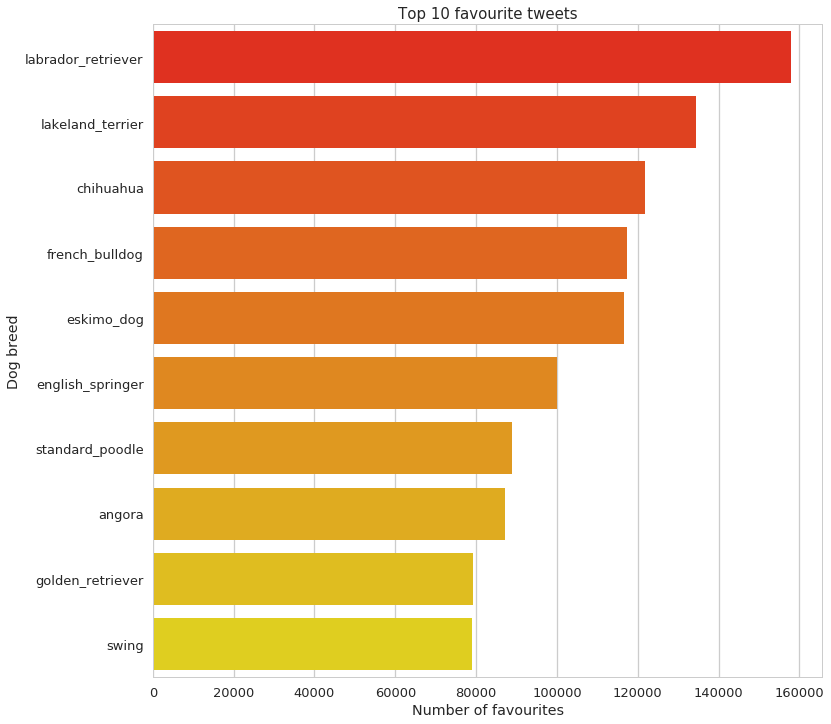

In [34]:
#Plotting a horizontal bar plot to visualize the data gathered above
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.color_palette("Blues")
ax=sns.barplot(x='favorite_count', y='p1', data=top10favourite,orient='h', palette="autumn")
ax.axes.set_title('Top 10 favourite tweets', fontsize=15)
ax.set(xlabel='Number of favourites', ylabel='Dog breed');

#### 3. What type of correlation can we observe between `favourite_ count` and `retweet_count` values?

In [35]:
#Finding out the Pearson R correlation coefficient for the values in the favorite_count and rewtweet_count columns
df_corr = twitter_archive_master[['favorite_count','retweet_count']]
df_corr.corr(method='pearson')

,favorite_count,retweet_count
favorite_count,1.00000,0.92919
retweet_count,0.92919,1.00000


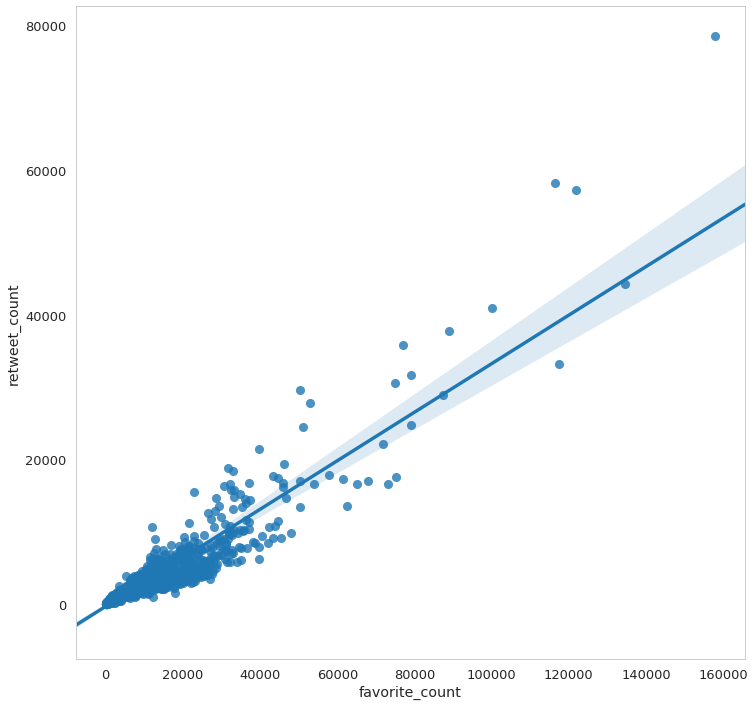

In [36]:
#Creating a scatter plot to better visualize the correlation between favorite_count and rewtweet_count values
plt.figure(figsize=(12,12))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(linestyle='')
sns.regplot(x='favorite_count',y='retweet_count', data = twitter_archive_master);

#### 4. What is the average score of the `p1_conf` coeffiecient? How are the confidence scores distributed?

In [37]:
#Calculating the average for p1_conf values
twitter_archive_master.p1_conf.mean()

0.59392843869653766

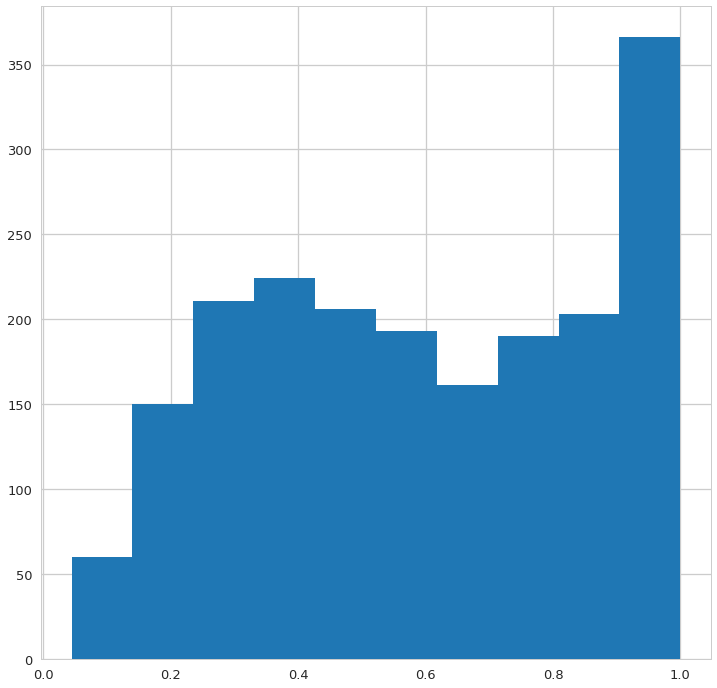

In [38]:
#Plotting the distribution of p1_conf values
plt.figure(figsize=(12,12))
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist('p1_conf', data = twitter_archive_master);

#### 5. What hours are the most popular for tweets to be tweeted at?

In [39]:
#Changing the timezone to US central and creating an hour column 
twitter_timezone = twitter_archive_master[['tweet_id','timestamp']]
twitter_timezone['timestamp'] = pd.to_datetime(twitter_timezone['timestamp'])
twitter_timezone['timestamp'] = twitter_timezone['timestamp'].dt.tz_localize('UTC').dt.tz_convert('US/Central')
twitter_timezone['time_hour'] = twitter_timezone['timestamp'].dt.hour
twitter_hours_1 = twitter_timezone.groupby('time_hour')['tweet_id'].count().reset_index()

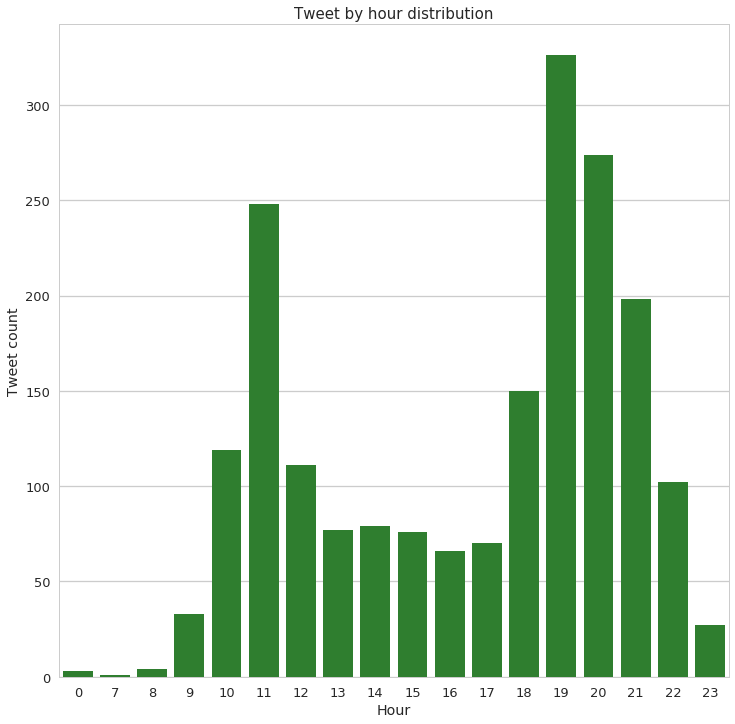

In [40]:
#Plotting visual for the hourly distribution of tweets
plt.figure(figsize=(12,12))
ax=sns.barplot(x='time_hour', y='tweet_id', data=twitter_hours_1, color='forestgreen')
ax.axes.set_title('Tweet by hour distribution', fontsize=15)
ax.set(xlabel='Hour', ylabel='Tweet count');

<a id='conclusions'></a>
## Conclusions

>Here are the answers to our curious doggo questions:

### 1. Which are the top 10 tweets based on the number of favourites counts? and 2. What are the dog breeds associated with the top 10 tweets mentioned above?

>1. 744234799360020481 - labrador retriever (157842 favourites)
>2. 822872901745569793 - lakeland_terrier (134504 favourites)
>3. 807106840509214720 - chihuahua (121854 favourites)
>4. 866450705531457537 - french_bulldog	(117429 favourites)
>5. 739238157791694849 - eskimo_dog (116547 favourites)
>6. 879415818425184262 - english_springer (100118 favourites)
>7. 819004803107983360 - standard_poodle (88954 favourites)
>8. 859196978902773760 - angora	(87287 favourites)
>9. 870374049280663552 - golden_retriever(79141 favourites)
>10. 678399652199309312 - bedlington_terrier(79080 favourites), based on the 2nd prediction of the neural network


### 3. What type of correlation can we observe between `favourite_ count` and `retweet_count` values?

>As per the table and visualization included, we can observe that a very strong positive correlation exists between the the number of retweets and the number of favourites a tweet gets, with the Pearson r coeffiecient being equal to 0.92. 

### 4. What is the average score of the `p1_conf` coeffiecient? How are the confidence scores distributed?

>The average score of the p1_conf coefficient is 0.59. As per the visualization of the distribution of values of p1_conf we can observe that most of the values fall within the 0.4 and 0.8 range. 

### 5. What hours are the most popular for tweets to be tweeted at?

>Based on the initial timestamps included, the data suggested that the most popular hours for tweets to be tweeted were 1 and 2 AM. As the timestamp values were taken in with a UTC timezone, we have changed these to a US central timezone, assuming that the owner of the WeRateDogs lives in the US. Based on this assumption, the most popular time range for tweeting is 7-10 PM, with a total of 800 tweets for this timeframe or 40.7% of total tweets included in the twitter_archive_master dataset.

